In [341]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cmath

# Loading data
Load the MovieLens data (ml-100k)

In [342]:
data_path = "C:\\Users\\Tubili\\Desktop\\Ders\\Recommender Systems\\Final Project\\ml-100k\\u.data"
data = pd.read_csv(data_path, 
                         sep='\t', 
                         error_bad_lines=False, 
                         low_memory=False,  
                         encoding="latin-1",
                   names=['userId', 'movieId', 'rating','timestamp'])

In [343]:
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Splitting data
Split the data into training set and test set. 
Prepare the training set as a user-item ratings matrix.

-> According the article we have to split test data from u.data(randomly %10)

-> Remains temp_data_train


In [344]:
# randomly %10 split the data set
test_size = 0.1
temp_data_train, temp_data_test = train_test_split(data, test_size=test_size, random_state=0)

# show shape of the data
temp_data_train.shape, temp_data_test.shape


((90000, 4), (10000, 4))

In [345]:
#splitting temp_data_test from data_test whose rating 5
data_test = temp_data_test[(temp_data_test.rating == 5.0)]
data_test.shape

(2087, 4)

In [346]:
#obtained data_train matrix which has %90 randomly data and removed from temp_test_data rating=5
data_train = temp_data_test[temp_data_test['rating'] != 5.0]
data_train = pd.concat([data_train, temp_data_train], ignore_index=True)
data_train.shape

(97913, 4)

In [347]:
user_ids = sorted(set(data_train['userId']))
movie_ids = sorted(set(data_train['movieId']))
n_users = len(user_ids)
n_movies = len(movie_ids)

print("Number of users: {}\nNumber of movies: {}".format(n_users, n_movies))

Number of users: 943
Number of movies: 1681


# Obtain User-Item Matrix
Fulfilling the NaN's with zeroes.


In [348]:
matrix_user_item = data_train.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
matrix_user_item

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting data respect to threshold
Obtain User-Item matrix(Aui) with complex number

In [349]:
threshold = 3
Aui =matrix_user_item.copy()
Aui[(0 < matrix_user_item) & (matrix_user_item < threshold)] = -1j
Aui[ matrix_user_item >= threshold ] = 1j
Aui.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,1j,1j,1j,1j,1j,1j,1j,(-0-1j),0j,1j,...,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
2,1j,0j,0j,0j,0j,0j,0j,0j,0j,(-0-1j),...,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
3,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,...,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
4,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,...,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
5,1j,1j,0j,0j,0j,0j,0j,0j,0j,0j,...,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j


# Creating User-User and Item-Item Matrix


In [350]:
# create a blank user-user(Auu) matrix containing zeros
matrix_user_user = np.zeros((n_users, n_users))
matrix_user_user.shape

(943, 943)

In [351]:
# create a blank item-item (Aii) matrix containing zeros
matrix_item_item = np.zeros((n_movies, n_movies))
matrix_item_item.shape

(1681, 1681)

In [352]:
#we will obtained transpose of user-item(Aui) matrix multiply minus 1. And put into item-user(Aui) matrix.
Aiu = Aui.T *-1
Aiu.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieId,,,,,,,,,,,,,,,,,,,,,
1,(-0-1j),(-0-1j),(-0+0j),(-0+0j),(-0-1j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),...,1j,(-0-1j),(-0-1j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j)
2,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),...,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j)
3,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),...,(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j)
4,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0-1j),...,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),1j,(-0+0j),(-0+0j),(-0+0j)
5,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),...,(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j)
6,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0+0j),...,(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j)
7,(-0-1j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),1j,(-0-1j),(-0-1j),(-0-1j),(-0-1j),...,(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0-1j),(-0+0j),(-0-1j),(-0-1j),(-0+0j),(-0+0j)
8,1j,(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0-1j),(-0+0j),(-0+0j),(-0+0j),...,(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0+0j),(-0+0j),(-0+0j)
9,(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0+0j),(-0-1j),(-0-1j),(-0+0j),(-0+0j),(-0-1j),...,(-0+0j),1j,(-0-1j),(-0-1j),(-0-1j),(-0-1j),(-0-1j),(-0+0j),(-0+0j),(-0-1j)


In [353]:
Aui.shape

(943, 1681)

# Merging all matrices
To obtain following matrix:

<img style="float: left;" src="Amatrix.PNG">


In [354]:
datas=np.hstack((matrix_user_user,Aui))
datas0=np.hstack((Aiu,matrix_item_item))
A = np.vstack((datas,datas0))
A.shape

(2624, 2624)

In [355]:
def fPredictions(A):
    #Sorting A³ matrix descending order
    #argsort gives us indexes
    rec_index = np.argsort(A,1)
    rec_index = np.flip(rec_index,1)
    rec_index
    
    predictions ={}
    for user in range (0, n_users):
        filtered = np.isin(rec_index[user],dict_unrated_movie_indexes[user])
        predictions[user] = rec_index[user][filtered]
    return predictions

In [428]:
rec_index

array([[ 445,  172,  707, ...,  861,  547,    0],
       [ 920,  342,  816, ...,  825,  469,    1],
       [ 172,  562,  472, ...,  799,  695,    2],
       ...,
       [1122, 1189, 2356, ..., 1031, 2554, 2621],
       [1600, 1169, 1313, ..., 1246, 1494, 2622],
       [1093, 1547, 2562, ..., 2339, 1534, 2623]], dtype=int64)

In [356]:
#calculating hit rates and coverage
def hitAndCovs(my_predictions):
    hit_rates=[]
    coverages = []

    for N in range(10,110,10):

        item_index = np.zeros((n_users, N))
        for user in range (0, n_users):
            item_index[user] = my_predictions[user][:N]+1


        hit_rate = 0
        for user in my_predictions:
            users = data_test['userId'].isin([(user+1)])
            movies = data_test['movieId'].isin((my_predictions[user][:N]+1))
            hit_rate += data_test[users & movies]['movieId'].count() 

        hit_rates.append( hit_rate / len(data_test.index))
        coverages.append(len(np.unique(item_index))/ n_movies)
    return hit_rates , coverages

In [430]:
coverages

[0.11778703152885188,
 0.18619869125520525,
 0.23914336704342654,
 0.2873289708506841,
 0.3325401546698394,
 0.37537180249851276,
 0.41939321832242715,
 0.45211183819155265,
 0.4895895300416419,
 0.5234979179060083]

In [360]:
unrated_movie_indexes = np.where(matrix_user_item == 0)
unrated_movie_indexes

(array([  0,   0,   0, ..., 942, 942, 942], dtype=int64),
 array([   8,   14,  107, ..., 1678, 1679, 1680], dtype=int64))

In [361]:
dict_unrated_movie_indexes = {}
for user, item in zip(unrated_movie_indexes[0], unrated_movie_indexes[1]):
    if user in dict_unrated_movie_indexes:
        dict_unrated_movie_indexes[user].append(item)
    else:
        dict_unrated_movie_indexes[user] = [item]


In [378]:
dict_coverageA = {}
dict_hitA = {}
for i in tqdm(range(3,10,2)):
    powerOfA = np.linalg.matrix_power(A, i)
    #Slicing only Aui matrix from A³ matrix
    powerOfAui=powerOfA[:Aui.shape[0],Aui.shape[0]:]
    powerOfAui
    hits, covs= hitAndCovs(fPredictions(powerOfAui))
    dict_coverageA[i] = covs
    dict_hitA[i]= hits


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:44<00:00, 11.10s/it]


In [379]:
dict_coverageA

{3: [0.11778703152885188,
  0.18619869125520525,
  0.23914336704342654,
  0.2873289708506841,
  0.3325401546698394,
  0.37537180249851276,
  0.41939321832242715,
  0.45211183819155265,
  0.4895895300416419,
  0.5234979179060083],
 5: [0.0725758477096966,
  0.1189767995240928,
  0.15764425936942297,
  0.1885782272456871,
  0.2183224271267103,
  0.24390243902439024,
  0.27483640690065436,
  0.2944675788221297,
  0.3182629387269482,
  0.34741225461035097],
 7: [0.07079119571683522,
  0.1124330755502677,
  0.14812611540749554,
  0.17608566329565734,
  0.2046400951814396,
  0.23200475907198095,
  0.2575847709696609,
  0.28019036287923854,
  0.3039857227840571,
  0.3271861986912552],
 9: [0.06960142772159429,
  0.11302795954788816,
  0.14812611540749554,
  0.17608566329565734,
  0.20345032718619868,
  0.2314098750743605,
  0.2575847709696609,
  0.28019036287923854,
  0.30339083878643663,
  0.32837596668649616]}

In [380]:
dict_hitA

{3: [0.25251557259223767,
  0.34882606612362244,
  0.4163871586008625,
  0.47436511739338766,
  0.5184475323430762,
  0.5553425970292286,
  0.5936751317680882,
  0.6205079060852899,
  0.6454240536655487,
  0.6669861044561571],
 5: [0.20364159080019167,
  0.291327264015333,
  0.35218016291327264,
  0.4015333013895544,
  0.4494489698131289,
  0.4940105414470532,
  0.5261140392908481,
  0.5563009103977,
  0.5836128413991375,
  0.6118830857690465],
 7: [0.19885002395783422,
  0.2846190704360326,
  0.3445136559655007,
  0.39386679444178246,
  0.4369908960229995,
  0.47149017728797316,
  0.5050311451844753,
  0.5395304264494489,
  0.5721130809774796,
  0.5965500718735026],
 9: [0.19837086727359846,
  0.2846190704360326,
  0.3445136559655007,
  0.39242932438907524,
  0.4355534259702923,
  0.46957355055103017,
  0.5016770483948251,
  0.5361763296597988,
  0.5706756109247724,
  0.5951126018207954]}

# Latent Factor


In [366]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader


reader = Reader()
# The columns must correspond to user id, movie id and ratings (in that order).
data = Dataset.load_from_df(data_train[['userId', 'movieId', 'rating']], reader)

train_dataset = data.build_full_trainset()

# Use the famous SVD algorithm.
svd = SVD(n_factors=5)

train_dataset = svd.fit(train_dataset)

pu = train_dataset.pu
qi = train_dataset.qi

print('PU = {} \n{}\n\n'.format(pu.shape, pu))
print('QI = {} \n{}'.format(qi.shape, qi))

PU = (943, 5) 
[[ 0.10598903 -0.03932216 -0.02110501 -0.25275966  0.09482595]
 [-0.38961549  0.25507941 -0.04983476  0.2746892   0.11325715]
 [ 0.12642864 -0.03945181  0.0238252   0.16194553  0.09229011]
 ...
 [-0.09863823 -0.19650884 -0.09958491  0.13100735  0.13491985]
 [ 0.08675761  0.13441631  0.14171081  0.14328733  0.25413466]
 [ 0.16206452 -0.15067179  0.12041127  0.11382457  0.13715953]]


QI = (1681, 5) 
[[ 0.2932864   0.12945387 -0.00438816  0.13038483 -0.01781858]
 [ 0.02815998  0.07014146 -0.29751083  0.1955694  -0.00187316]
 [ 0.05015792 -0.11090411 -0.21063835  0.09995609  0.01281869]
 ...
 [-0.07746266 -0.05058312 -0.21419113 -0.00968424  0.01143839]
 [ 0.02310548 -0.02543258  0.10962978 -0.17285638  0.02036462]
 [-0.00160876 -0.14089269  0.11931299  0.29535567 -0.0139208 ]]


# Finding Similarities

In [367]:
from sklearn.metrics.pairwise import cosine_similarity
#Finding similarities for user-user matrix
user_similarity = cosine_similarity(pu)
item_similarity = cosine_similarity(qi)
print('Cosine Similarity User Array Shape = \n{}\n\n'.format(user_similarity.shape))
print('Cosine Similarity User Array = \n{}\n'.format(user_similarity))


Cosine Similarity User Array Shape = 
(943, 943)


Cosine Similarity User Array = 
[[ 1.         -0.66950712 -0.26287163 ... -0.23327353 -0.10553619
   0.05296847]
 [-0.66950712  1.         -0.04369854 ...  0.26241323  0.30692031
  -0.35507565]
 [-0.26287163 -0.04369854  1.         ...  0.37780909  0.66994547
   0.85127388]
 ...
 [-0.23327353  0.26241323  0.37780909 ...  1.          0.03592616
   0.37116917]
 [-0.10553619  0.30692031  0.66994547 ...  0.03592616  1.
   0.55586319]
 [ 0.05296847 -0.35507565  0.85127388 ...  0.37116917  0.55586319
   1.        ]]



In [368]:
print('Cosine Similarity Item Array Shape = \n{}\n\n'.format(item_similarity.shape))
print('Cosine Similarity Item Array = \n{}\n'.format(item_similarity))

Cosine Similarity Item Array Shape = 
(1681, 1681)


Cosine Similarity Item Array = 
[[ 1.          0.35021559  0.15430868 ... -0.36769448 -0.27529338
   0.16160073]
 [ 0.35021559  1.          0.79113851 ...  0.65901265 -0.8904708
   0.09744719]
 [ 0.15430868  0.79113851  1.         ...  0.74750642 -0.65790379
   0.21523548]
 ...
 [-0.36769448  0.65901265  0.74750642 ...  1.         -0.45280373
  -0.261641  ]
 [-0.27529338 -0.8904708  -0.65790379 ... -0.45280373  1.
  -0.477462  ]
 [ 0.16160073  0.09744719  0.21523548 ... -0.261641   -0.477462
   1.        ]]



In [369]:
#putting 1 / -1 user user similarity matrix
user_similarity[user_similarity >= 0] = 1
user_similarity[user_similarity <  0] = -1

print('Similarity User Array Shape = \n{}\n\n'.format(user_similarity.shape))
print('User similarity Array with -1/1  \n{}\n'.format(user_similarity))

Similarity User Array Shape = 
(943, 943)


User similarity Array with -1/1  
[[ 1. -1. -1. ... -1. -1.  1.]
 [-1.  1. -1. ...  1.  1. -1.]
 [-1. -1.  1. ...  1.  1.  1.]
 ...
 [-1.  1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1.  1.  1.]
 [ 1. -1.  1. ...  1.  1.  1.]]



In [370]:
#putting 1 / -1 user user similarity matrix
item_similarity[item_similarity >= 0] = 1
item_similarity[item_similarity <  0] = -1

print('Similarity Item Array Shape = \n{}\n\n'.format(item_similarity.shape))
print('Item similarity Array with -1/1  \n{}\n'.format(item_similarity))

Similarity Item Array Shape = 
(1681, 1681)


Item similarity Array with -1/1  
[[ 1.  1.  1. ... -1. -1.  1.]
 [ 1.  1.  1. ...  1. -1.  1.]
 [ 1.  1.  1. ...  1. -1.  1.]
 ...
 [-1.  1.  1. ...  1. -1. -1.]
 [-1. -1. -1. ... -1.  1. -1.]
 [ 1.  1.  1. ... -1. -1.  1.]]



# Merging all matrices
To obtain following matrix with user-user similarity and item-item similarity matrices

<img style="float: left;" src="Amatrix.PNG">


In [371]:
datas=np.hstack((user_similarity,Aui))
datas0=np.hstack((Aiu,item_similarity))
B = np.vstack((datas,datas0))
B.shape

(2624, 2624)

In [374]:
dict_coverageB = {}
dict_hitB = {}
for i in tqdm(range(3,10,2)):
    powerOfB = np.linalg.matrix_power(B, i)
    #Slicing only Aui matrix from A³ matrix
    powerOfBui=powerOfB[:Aui.shape[0],Aui.shape[0]:]
    powerOfBui
    hits, covs= hitAndCovs(fPredictions(powerOfBui))
    dict_coverageB[i] = covs
    dict_hitB[i]= hits


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:44<00:00, 10.97s/it]


In [375]:
dict_hitB

{3: [0.07139434595112602,
  0.10781025395304264,
  0.13560134163871587,
  0.15476760900814565,
  0.17153809295639674,
  0.1902252036415908,
  0.20459990416866317,
  0.21801629132726402,
  0.2261619549592717,
  0.24053665548634404],
 5: [0.012937230474365118,
  0.020603737422137038,
  0.02731193100143747,
  0.037374221370388115,
  0.04647819837086727,
  0.05366554863440345,
  0.06085289889793963,
  0.06564446574029707,
  0.07043603258265453,
  0.0776233828461907],
 7: [0.005749880210828941,
  0.011978917105893628,
  0.019166267369429803,
  0.026832774317201723,
  0.033540967896502155,
  0.039770004791566844,
  0.044561571633924296,
  0.05174892189746047,
  0.05654048873981792,
  0.06612362242453282],
 9: [0.006229036895064686,
  0.010541447053186392,
  0.015333013895543843,
  0.022520364159080018,
  0.030666027791087687,
  0.03881169142309535,
  0.04647819837086727,
  0.05270723526593196,
  0.05654048873981792,
  0.06324868231911836]}

In [311]:
dict_coverageB

{3: [0.2135633551457466,
  0.24687685901249257,
  0.2766210588935158,
  0.3093396787626413,
  0.330755502676978,
  0.3581201665675193,
  0.3729922665080309,
  0.3866745984533016,
  0.4045211183819155,
  0.42058298631766805],
 5: [0.2135633551457466,
  0.24687685901249257,
  0.2766210588935158,
  0.3093396787626413,
  0.330755502676978,
  0.3581201665675193,
  0.3729922665080309,
  0.3866745984533016,
  0.4045211183819155,
  0.42058298631766805],
 7: [0.2135633551457466,
  0.24687685901249257,
  0.2766210588935158,
  0.3093396787626413,
  0.330755502676978,
  0.3581201665675193,
  0.3729922665080309,
  0.3866745984533016,
  0.4045211183819155,
  0.42058298631766805],
 9: [0.2135633551457466,
  0.24687685901249257,
  0.2766210588935158,
  0.3093396787626413,
  0.330755502676978,
  0.3581201665675193,
  0.3729922665080309,
  0.3866745984533016,
  0.4045211183819155,
  0.42058298631766805]}

# Coverage and Hit Rate Graphics

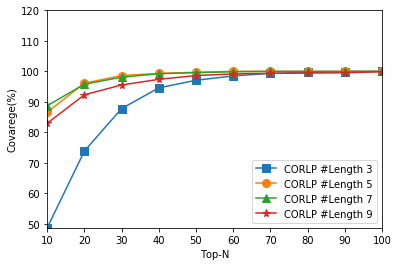

In [420]:
x = np.arange(10, 110, 10) #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = np.zeros((4,10))
marker = ['s', 'o', '^', '*']
fig, ax = plt.subplots()
count = 0
for key, value in dict_coverageB.items():
    y[count] = np.multiply(value,100)
    
    ax.plot(x, 
        y[count],
        marker=marker[count], 
        markersize=8,
        label='CORLP #Length {}'.format(key))
    count = count + 1

plt.xlabel("Top-N")
plt.ylabel("Covarege(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(),y.max()+20)

leg = ax.legend(loc='lower right')

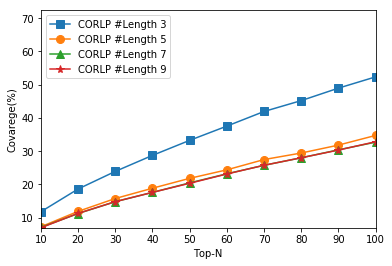

In [422]:
x = np.arange(10, 110, 10) #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = np.zeros((4,10))
marker = ['s', 'o', '^', '*']
fig, ax = plt.subplots()
count = 0
for key, value in dict_coverageA.items():
    y[count] = np.multiply(value,100)
    
    ax.plot(x, 
        y[count],
        marker=marker[count], 
        markersize=8,
        label='CORLP #Length {}'.format(key))
    count = count + 1

plt.xlabel("Top-N")
plt.ylabel("Covarege(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(),y.max()+20)

leg = ax.legend(loc='upper left')

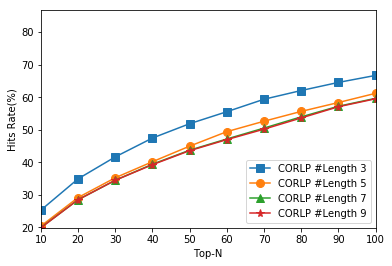

In [423]:
x = np.arange(10, 110, 10) #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = np.zeros((4,10))
marker = ['s', 'o', '^', '*']
fig, ax = plt.subplots()
count = 0
for key, value in dict_hitA.items():
    y[count] = np.multiply(value,100)
    
    ax.plot(x, 
        y[count],
        marker=marker[count], 
        markersize=8,
        label='CORLP #Length {}'.format(key))
    count = count + 1

plt.xlabel("Top-N")
plt.ylabel("Hits Rate(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(),y.max()+20)

leg = ax.legend(loc='lower right')

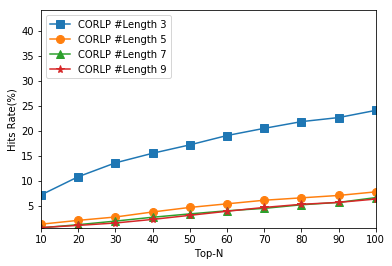

In [425]:
x = np.arange(10, 110, 10) #[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = np.zeros((4,10))
marker = ['s', 'o', '^', '*']
fig, ax = plt.subplots()
count = 0
for key, value in dict_hitB.items():
    y[count] = np.multiply(value,100)
    
    ax.plot(x, 
        y[count],
        marker=marker[count], 
        markersize=8,
        label='CORLP #Length {}'.format(key))
    count = count + 1

plt.xlabel("Top-N")
plt.ylabel("Hits Rate(%)")
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(),y.max()+20)

leg = ax.legend(loc='upper left')